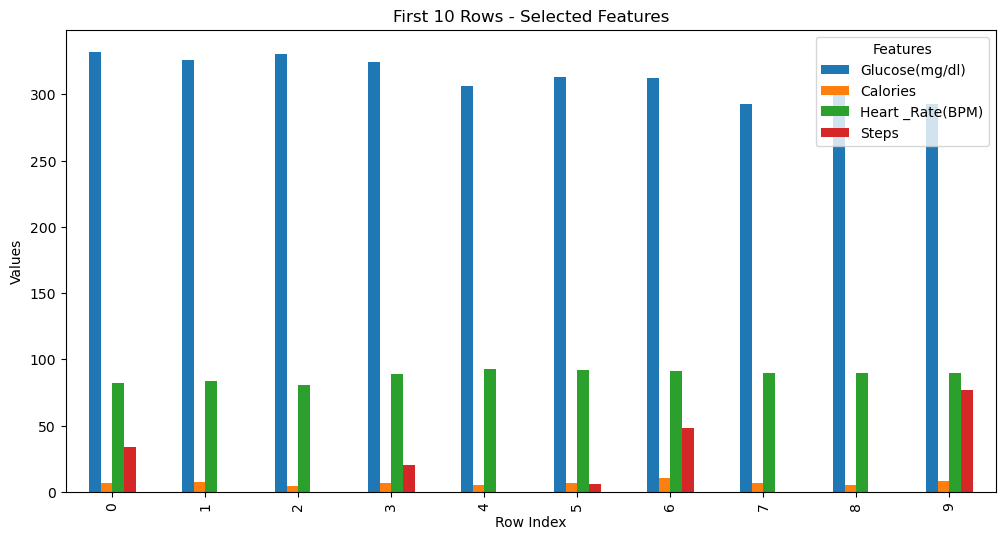

In [1]:
#1.  Load the dataset and show the first 10 rows.
#Reason: the first 10 rows of your dataset along with a bar chart showing selected features
#(Glucose, Calories, Heart Rate, and Steps).
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Select first 10 rows
df_head = df.head(10)

# Plot first 10 rows for a few selected numeric columns
df_head[['Glucose(mg/dl)', 'Calories', 'Heart _Rate(BPM)', 'Steps']].plot(
    kind='bar', figsize=(12,6)
)

# Chart formatting
plt.title("First 10 Rows - Selected Features")
plt.xlabel("Row Index")
plt.ylabel("Values")
plt.legend(title="Features")
plt.show()


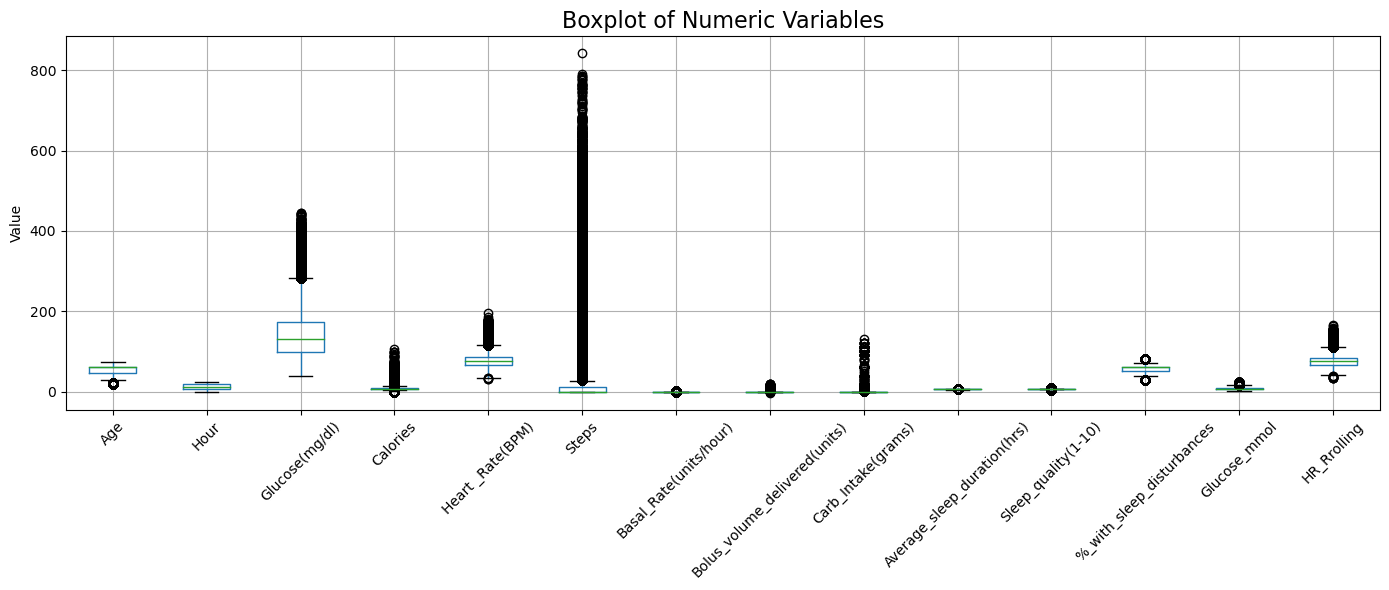

In [2]:
#2.What are the summary statistics (mean, std, min, max) for all numeric variables?
#Reason:

import pandas as pd
import matplotlib.pyplot as plt
# Load dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Plot boxplot for all numeric columns
plt.figure(figsize=(14,6))
df.boxplot(rot=90)  # rotate x-axis labels for readability
plt.title("Boxplot of Numeric Variables", fontsize=16)
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

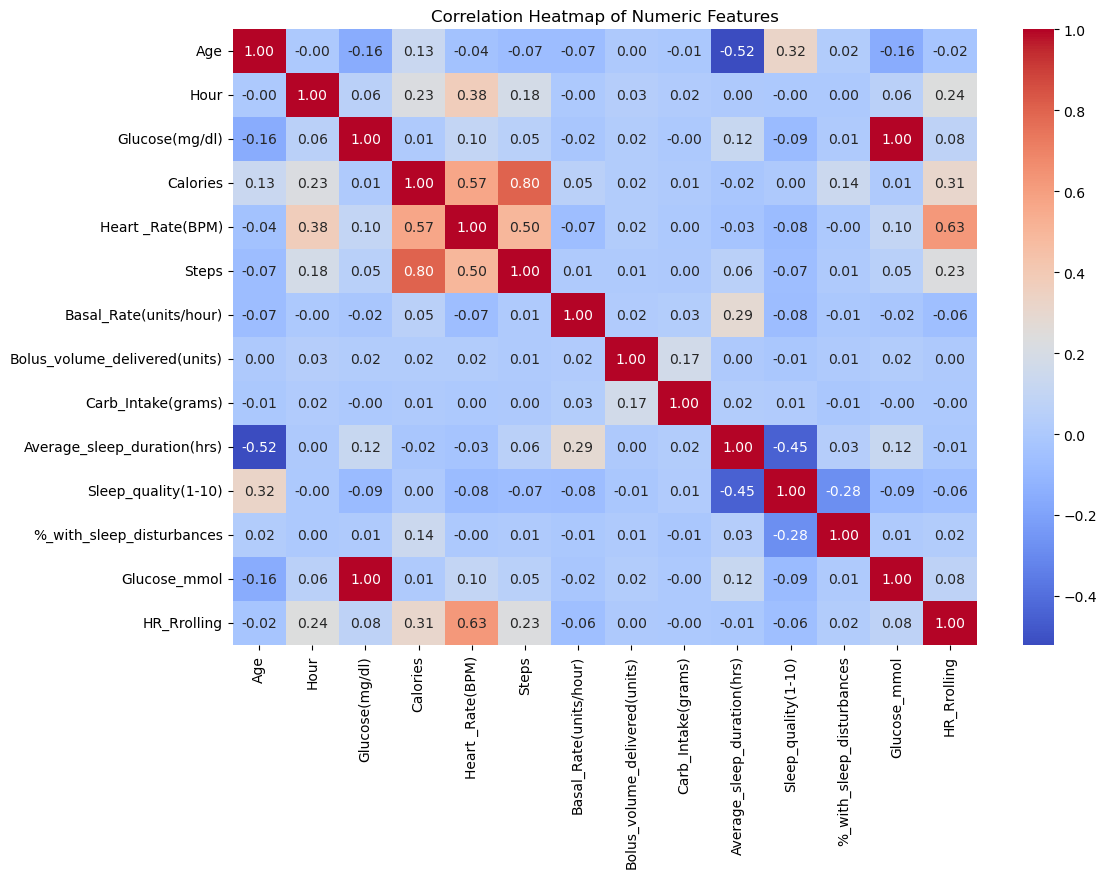

In [3]:
#3.Compute and visualize the correlation chart of numeric features.
#Reason:Positive correlation (+1) → As one increases, the other tends to increase.
#Negative correlation (−1) → As one increases, the other tends to decrease.
#Zero correlation (0) → No linear relationship.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load your dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Step 2: Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 3: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 4: Visualize correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

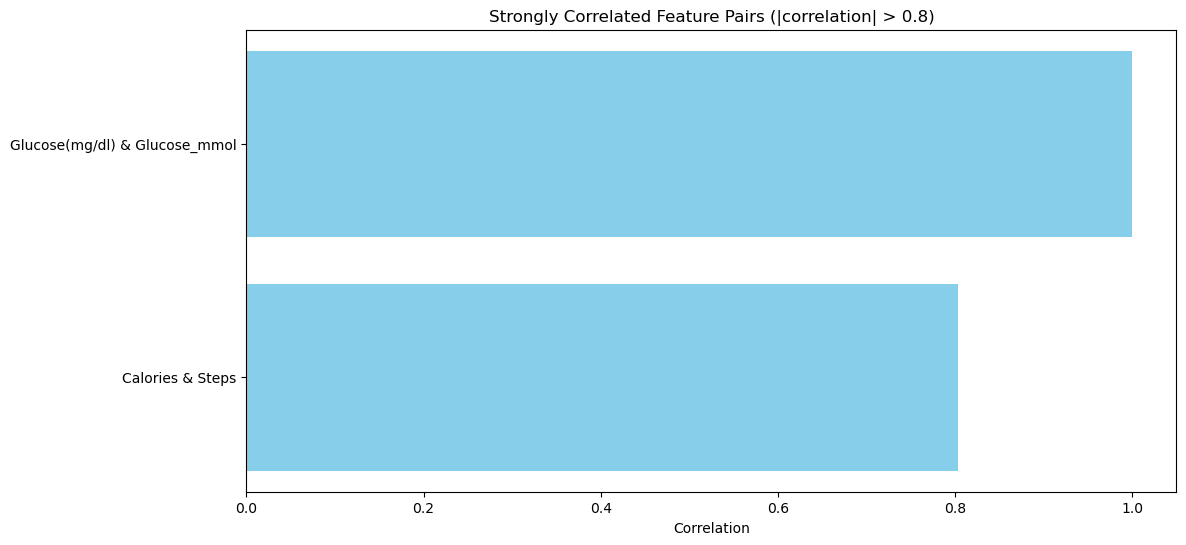

In [4]:
#4.Which variables show strong multicollinearity (correlation > 0.8)?
#reason: strong multicollinearity (|correlation| > 0.8) in a bar chart,This chart will visually show which feature pairs have strong multicollinearity and their correlation values.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Step 2: Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 3: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 4: Find pairs with strong correlation (>|0.8|), excluding self-correlation
strong_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # upper triangle
strong_corr_pairs = strong_corr.stack().reset_index()
strong_corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'].abs() > 0.8]

# Step 5: Create a new column with combined feature names for plotting
strong_corr_pairs['Feature Pair'] = strong_corr_pairs['Feature 1'] + " & " + strong_corr_pairs['Feature 2']

# Step 6: Sort by correlation strength
strong_corr_pairs = strong_corr_pairs.sort_values(by='Correlation', ascending=False)

# Step 7: Plot bar chart
plt.figure(figsize=(12,6))
plt.barh(strong_corr_pairs['Feature Pair'], strong_corr_pairs['Correlation'], color='skyblue')
plt.xlabel("Correlation")
plt.title("Strongly Correlated Feature Pairs (|correlation| > 0.8)")
plt.gca().invert_yaxis()  # Highest correlation on top
plt.show()


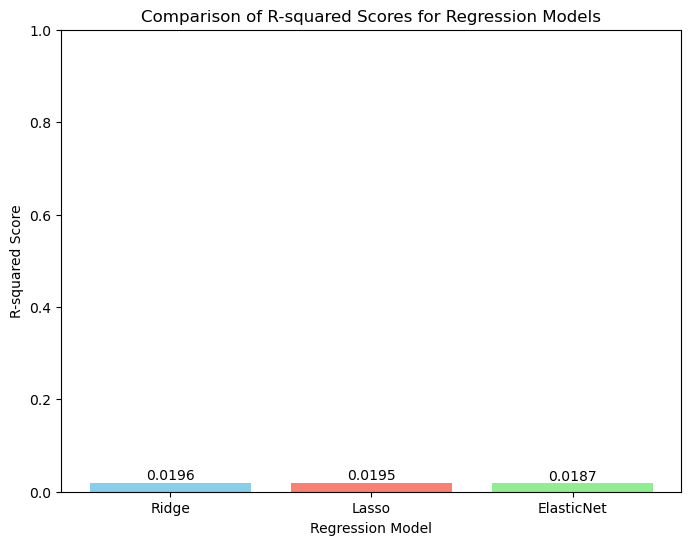

In [6]:
#Compare Ridge vs Lasso vs ElasticNet regression results.
#Reason:Comparing the regression models based on their R2 scores, 
#which measure how well the model's predictions fit the actual data.
#R2 Scores.
#Ridge: 0.0196
#Lasso: 0.0195
#ElasticNet: 0.0187
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import matplotlib.pyplot as plt

# Load dataset
file_path = r"D:\Numpy Ninja\Pyhton Hackthon_Aug-2025\Dataset\final_dataset-Hupa.csv"
df = pd.read_csv(file_path)

# Select the features and target.
features = ['Calories', 'Heart _Rate(BPM)', 'Steps', 'Basal_Rate(units/hour)', 'Bolus_volume_delivered(units)', 'Carb_Intake(grams)']
target = 'Glucose(mg/dl)'

X = df[features]
y = df[target]

# Handle potential missing values by filling with the mean.
X = X.fillna(X.mean())

# Scale the features.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the models.
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the models.
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)

# Evaluate the models and get R-squared scores.
ridge_score = ridge.score(X_test, y_test)
lasso_score = lasso.score(X_test, y_test)
elasticnet_score = elasticnet.score(X_test, y_test)

# Create a bar chart to visualize the comparison.
models = ['Ridge', 'Lasso', 'ElasticNet']
r2_scores = [ridge_score, lasso_score, elasticnet_score]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Comparison of R-squared Scores for Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)

# Add value labels on the bars.
for i, score in enumerate(r2_scores):
    plt.text(i, score, f'{score:.4f}', ha='center', va='bottom')

# Save the plot.
plt.savefig('regression_model_comparison.png')